# Analyzing Global Power Plant Database  

Science one of the greatest invension is the electricity. It has many applications in our everyday life. It is used for lighting rooms, operating fans and household equipment such as electrical stoves, A/C and more. All of these give people warmth. Huge machines are operating in factories with the aid of electricity. Important items like food, fabric, paper and many other items are the result of electricity. The economic and overall infrastructure of a country depends on electricity.

## Introduction

In this analysis, I am going to use a power plant dataset. The dataset contain information of verious type of power plant around the world such as thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). The database includes nearly 30,000 power plants from 164 countries. 

The database is accessible via the WRI Open Data Platform for download and use. https://datasets.wri.org/dataset/globalpowerplantdatabase or https://www.kaggle.com/georgeputhean/globalpowerplantdata


In [52]:
!pip install pandas --upgrade

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.2)


In [53]:
!pip install jovian opendatasets --upgrade --quiet

In [54]:
import pandas as pd 

In [55]:
import opendatasets as od
od.download('https://www.kaggle.com/georgeputhean/globalpowerplantdata')

Kaggle dataset ID:  georgeputhean/globalpowerplantdata
Using downloaded and verified file: ./globalpowerplantdata.zip
Extracting archive ./globalpowerplantdata.zip to ./globalpowerplantdata


In [56]:
global_power_plant_raw_df = pd.read_csv('./globalpowerplantdata/global_power_plant_database.csv')

Using the read_csv() method, the "Global Power Plant" comma separated values (csv) file that was downloaded and save in the same directory converted into datafram.  

In [57]:
global_power_plant_raw_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29905,ZMB,Zambia,Ndola,WRI1022386,50.00,-12.9667,28.6333,Oil,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1089529,NaN,NaN,NaN,NaN,NaN,NaN,120.872642
29906,ZMB,Zambia,Nkana,WRI1022384,20.00,-12.8167,28.2000,Oil,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1043097,NaN,NaN,NaN,NaN,NaN,NaN,48.349057
29907,ZMB,Zambia,Victoria Falls,WRI1022380,108.00,-17.9167,25.8500,Hydro,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1033763,NaN,NaN,NaN,NaN,NaN,NaN,702.100000
29908,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.00,-18.3835,26.4700,Coal,NaN,NaN,NaN,NaN,NaN,GEODB,http://globalenergyobservatory.org,GEODB,1033856,2017.0,NaN,NaN,NaN,NaN,NaN,4397.000000


There are 29910 rows and 24 columns. Each power plant contain information of it's plant capacity, gereration, fuel type, year of plant operation, electricity generation in gigawatt-hours in years from 2013 to 2017 and estimated generation in the following year etc.  

In [58]:
global_power_plant_raw_df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')

All the column labels from datafram can obtain by colums method.

# Data Preparation & Cleaning

In [59]:
global_power_plant_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   29910 non-null  object 
 1   country_long              29910 non-null  object 
 2   name                      29910 non-null  object 
 3   gppd_idnr                 29910 non-null  object 
 4   capacity_mw               29910 non-null  float64
 5   latitude                  29910 non-null  float64
 6   longitude                 29910 non-null  float64
 7   primary_fuel              29910 non-null  object 
 8   other_fuel1               1963 non-null   object 
 9   other_fuel2               303 non-null    object 
 10  other_fuel3               104 non-null    object 
 11  commissioning_year        16303 non-null  float64
 12  owner                     19531 non-null  object 
 13  source                    29895 non-null  object 
 14  url   

Using the info() function a short summary of the global power plant dataframe is made and print the information about the datafram including the index dtype and column dtypes, non-null values and memory usage.


In [60]:
selected_column = [
    'country',
    'country_long',
    'name',
    'capacity_mw',
    'primary_fuel',
    'other_fuel1',
    'other_fuel2',
    'other_fuel3',
    'commissioning_year',
    'year_of_capacity_data',
    'generation_gwh_2013',
    'generation_gwh_2014',
    'generation_gwh_2015',
    'generation_gwh_2016',
    'generation_gwh_2017',
    'estimated_generation_gwh'
]

The global database of power plants contains a lot of resources, but in this step we are going to restrict the study of columns, such as the type of use of fuel, plants belong to which country, year of the plant operation, estimate generation of power plant, etc. There are 16 columns that have been chosen for review.

In [61]:
len(selected_column)

16

In [62]:
global_power_plant_df = global_power_plant_raw_df[selected_column].copy()

Sixteen selected columns are copy from the datafram.

In [63]:
global_power_plant_df.sample(5)

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
1159,BRA,Brazil,Areal,18.0,Hydro,NaN,NaN,NaN,1949.0,2017.0,NaN,NaN,NaN,NaN,NaN,68.563283
18535,GBR,United Kingdom,Binn Landfill,1.9,Waste,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.406018
16454,SAU,Saudi Arabia,AL-JOUF,348.0,Oil,NaN,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,1066.249276
3875,CAN,Canada,Hollow Bridge,5.3,Hydro,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN,25.130972
25853,USA,United States of America,Monterey Regional Water Pollution Contro,1.0,Solar,NaN,NaN,NaN,2011.0,2017.0,2.44332,1.59291,1.66122,1.282,1.388,NaN


Using sample(x) method x random row of power plants data from the datafram are shown.

In [64]:
global_power_plant_df.describe()

,capacity_mw,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,29910.000000,16303.000000,13743.000000,6996.000000,7440.000000,8144.000000,8971.000000,9213.000000,21791.000000
mean,186.294810,1995.486227,2016.860001,689.625437,664.840134,664.270784,583.622877,579.524723,847.036474
std,525.703572,23.525537,1.195205,2330.869715,2258.351290,2304.225386,2097.603620,2063.070235,4067.434967
min,1.000000,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,0.000000
25%,4.774430,1986.000000,2017.000000,2.167000,2.157000,2.350250,2.380500,3.202000,10.082961
50%,18.900000,2005.000000,2017.000000,27.033000,23.005000,22.094000,17.862000,20.462000,53.417041
75%,100.000000,2012.063866,2017.000000,250.600500,224.955250,238.437917,187.084835,192.567000,339.874490
max,22500.000000,2018.000000,2018.000000,50834.000000,32320.917000,59546.865000,32377.477000,35116.000000,450562.692350


There are some power plants that has negative generation of power. It seems like a mistake in the dataset but there are some power plant those consume more energy than they are produce. 

In [65]:
global_power_plant_df[global_power_plant_df.generation_gwh_2013 == -947.6000000]

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
21397,USA,United States of America,Bath County,2862.0,Hydro,NaN,NaN,NaN,1986.0,2017.0,-947.6,-989.619,-864.428,-768.62,-934.944,NaN


Hydro power plant generates electricity from turbine-driven generators that transform the potential energy of falling or fast-flowing water into mechanical energy.The Bath County is a pumped storage power plant. Plants require electrical energy to pump uphill water, there are net negative electricity generation balances for this pumped storage hydro plants.

# Exploratory Analysis and Visualization

In [66]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [102]:
global_power_plant_df.country_long.nunique()

164

There are a total of 164 countries with data of various types of power plants. 

### Let's look up at top 20 countries with heights amount of power plants.

We can calculated the total amount of power plant by count the country name.

The method value_counts() is use to count the total amount of time a country name is appear in the datafram and head(20) to get the top 20. 

In [68]:
countries_plant = global_power_plant_df.country_long.value_counts().head(20)
countries_plant

United States of America    8686
China                       3041
United Kingdom              2536
Brazil                      2340
France                      2017
Canada                      1154
Germany                      982
India                        861
Spain                        614
Russia                       505
Portugal                     462
Czech Republic               457
Australia                    429
Japan                        329
Norway                       306
Chile                        254
Mexico                       251
Italy                        247
Argentina                    231
Vietnam                      220
Name: country_long, dtype: int64

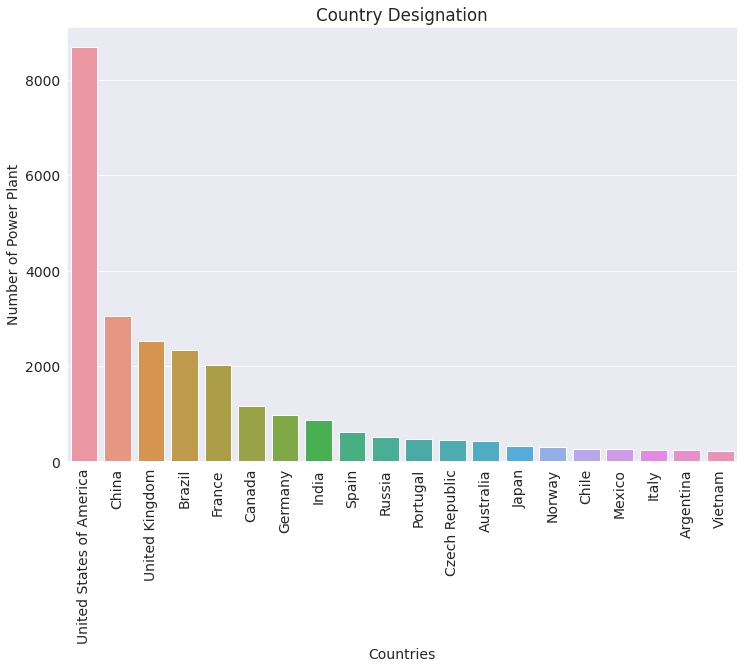

In [69]:
sns.barplot(x = countries_plant.index, y = countries_plant)
plt.xticks(rotation = 90)
plt.title('Country Designation')
plt.ylabel('Number of Power Plant')
plt.xlabel('Countries');

### Fuel use in power plant.

Various types of fuel are used in the power plant, which can be classified as primary fuel, other fuel-1, other fuel-2, etc. Primary fuel is used to run the main turbine to generate electricity and other fuels are used to run auxiliary machines to support the generation process.

In [70]:
main_primary_fuel = global_power_plant_df.primary_fuel.value_counts() * 100 / global_power_plant_df.primary_fuel.count()
main_primary_fuel

Hydro             23.921765
Solar             19.822802
Wind              17.345369
Gas               13.112671
Coal               7.990639
Oil                7.656302
Biomass            4.667335
Waste              3.634236
Nuclear            0.661986
Geothermal         0.631896
Storage            0.193915
Other              0.147108
Cogeneration       0.137078
Petcoke            0.043464
Wave and Tidal     0.033434
Name: primary_fuel, dtype: float64

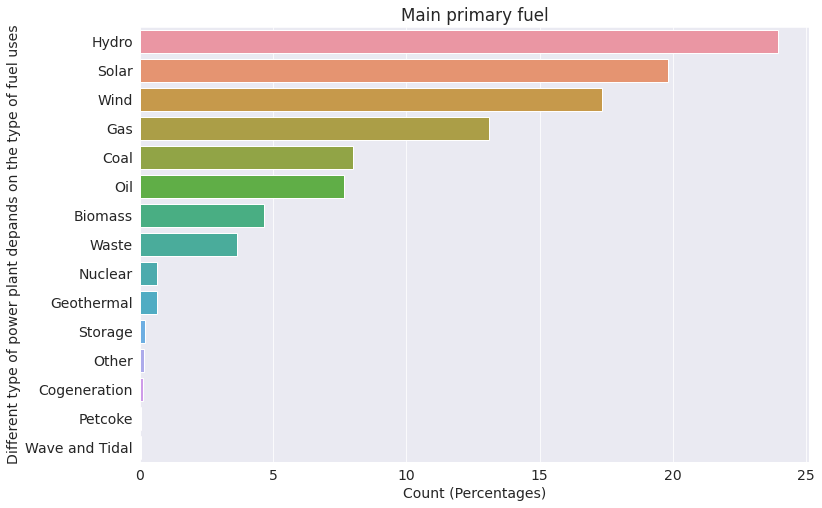

In [71]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

Renewable energy-based power plants have higher percentages that are beneficial to our future generation. Global warming is the next major threat that we all have to face. It is a good sign that the use of hydro, solar and wind power plants is increasing.

### Type of power plant and their capacity

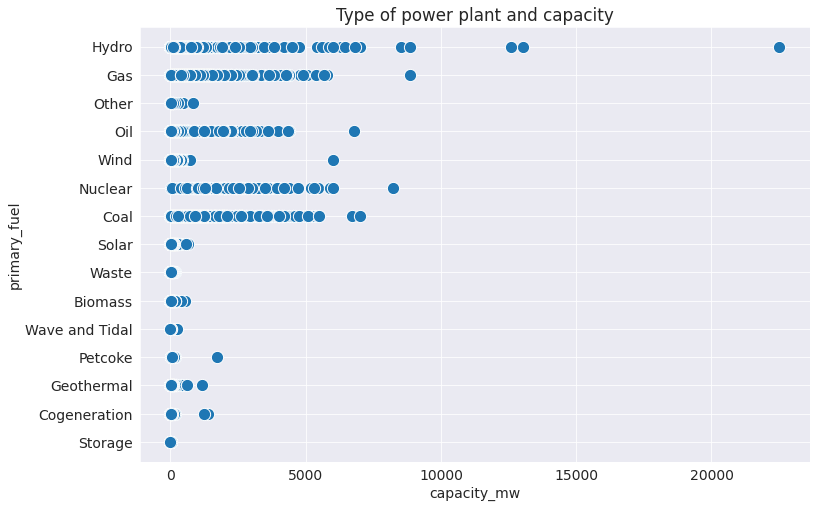

In [72]:
sns.scatterplot(x = global_power_plant_df.capacity_mw, y = global_power_plant_df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

The Hydro Power Plant has most of the high-capacity power plant. There is only 0.67 per cent of the nuclear power plant, but the capacity of the power plant is high. In spite of having a higher percentage, the solar power plant has a small capacity.

### Capacity of generating power in the top 20 countries.

Using groupby() method we can split the datafram into country name and their capacity of generating power.

In [73]:
countries_capacity = global_power_plant_df.groupby('country_long')[['capacity_mw']].sum().sort_values('capacity_mw', ascending = False).head(20)
countries_capacity

,capacity_mw
country_long,
China,1.363283e+06
United States of America,1.193616e+06
India,2.886941e+05
Russia,2.275556e+05
Japan,2.116677e+05
Brazil,1.457885e+05
Canada,1.434552e+05
France,1.092853e+05
Germany,1.091628e+05


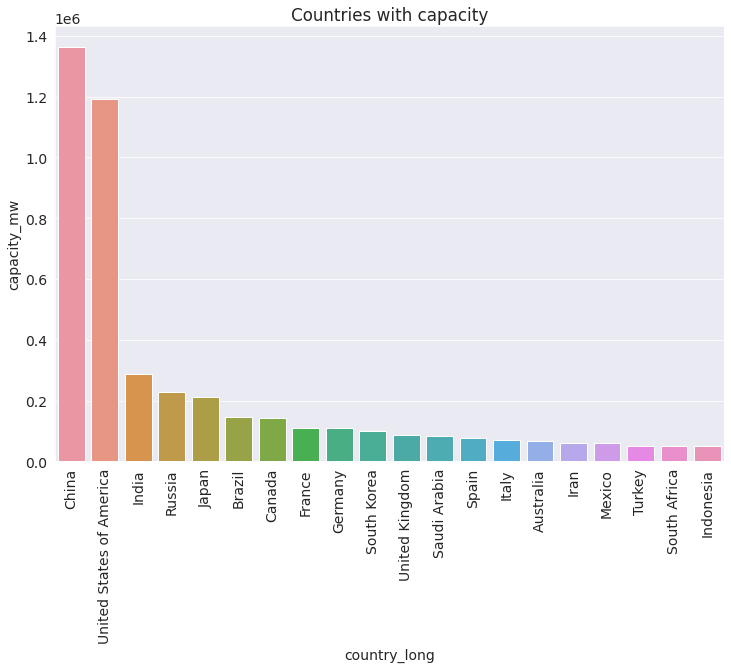

In [74]:
sns.barplot(x = countries_capacity.index, y = countries_capacity.capacity_mw)
plt.xticks(rotation = 90)
plt.title('Countries with capacity');

China and the United States are the two largest economies in the world, as well as two large countries with a huge population. It was therefore obvious that two economic giant countries were at the top of the list. 

### Generation of power in USA, India and Australia during 2013, 2014, 2015, 2015, 2017.

In the generation gwh column, many year has missing data (e.g. generation gwh 2013 has 22914 nun value from 29910 column). So, in order to compare the generation amoung different year, it is appropriate to select some countries which data are present in the five-year period. The United States of America, India and Australia are selected for this of scenario.

In [75]:
global_power_plant_df.generation_gwh_2013.isna().sum()

22914

In [76]:
est_gen_2013 = global_power_plant_df.groupby('country_long')[['generation_gwh_2013']].sum().sort_values('generation_gwh_2013', ascending = False).head(10)
est_gen_2013_UIA = est_gen_2013[est_gen_2013.index.isin(['United States of America', 'India', 'Australia'])]

In [77]:
est_gen_2014 = global_power_plant_df.groupby('country_long')[['generation_gwh_2014']].sum().sort_values('generation_gwh_2014', ascending = False).head(10)
est_gen_2014_UIA = est_gen_2014[est_gen_2014.index.isin(['United States of America', 'India', 'Australia'])]

In [78]:
est_gen_2015 = global_power_plant_df.groupby('country_long')[['generation_gwh_2015']].sum().sort_values('generation_gwh_2015', ascending = False).head(20)
est_gen_2015_UIA = est_gen_2015[est_gen_2015.index.isin(['United States of America', 'India', 'Australia'])]

In [79]:
est_gen_2016 = global_power_plant_df.groupby('country_long')[['generation_gwh_2016']].sum().sort_values('generation_gwh_2016', ascending = False).head(20)
est_gen_2016_UIA = est_gen_2016[est_gen_2016.index.isin(['United States of America', 'India', 'Australia'])]

In [80]:
est_gen_2017 = global_power_plant_df.groupby('country_long')[['generation_gwh_2017']].sum().sort_values('generation_gwh_2017', ascending = False).head(10)
est_gen_2017_UIA = est_gen_2017[est_gen_2017.index.isin(['United States of America', 'India', 'Australia'])]


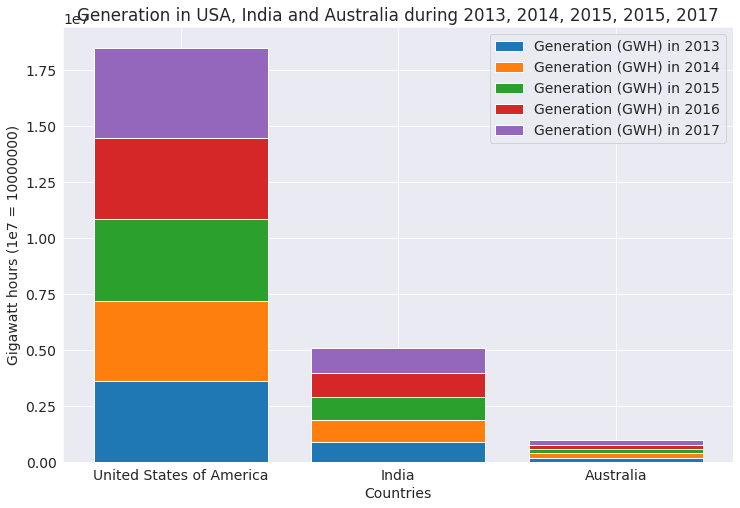

In [81]:
plt.bar(est_gen_2013_UIA.index, est_gen_2013_UIA.generation_gwh_2013)
plt.bar(est_gen_2014_UIA.index, est_gen_2014_UIA.generation_gwh_2014, bottom = est_gen_2013_UIA.generation_gwh_2013);
plt.bar(est_gen_2015_UIA.index, est_gen_2015_UIA.generation_gwh_2015, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014)
plt.bar(est_gen_2016_UIA.index, est_gen_2016_UIA.generation_gwh_2016, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014 + est_gen_2015_UIA.generation_gwh_2015)
plt.bar(est_gen_2017_UIA.index, est_gen_2017_UIA.generation_gwh_2017, bottom = est_gen_2013_UIA.generation_gwh_2013 + est_gen_2014_UIA.generation_gwh_2014 + est_gen_2015_UIA.generation_gwh_2015 + est_gen_2016_UIA.generation_gwh_2016)
plt.legend(['Generation (GWH) in 2013', 'Generation (GWH) in 2014', 'Generation (GWH) in 2015', 'Generation (GWH) in 2016', 'Generation (GWH) in 2017'])
plt.title('Generation in USA, India and Australia during 2013, 2014, 2015, 2015, 2017')
plt.xlabel('Countries')
plt.ylabel('Gigawatt hours (1e7 = 10000000)');

To make comparison more easier, stacked bar plot is used for each of the years.

It is clearly seen that for every year the generating power is increase in every country.

### Different type of primary fuel based power plant and their year of  going to the first operation.

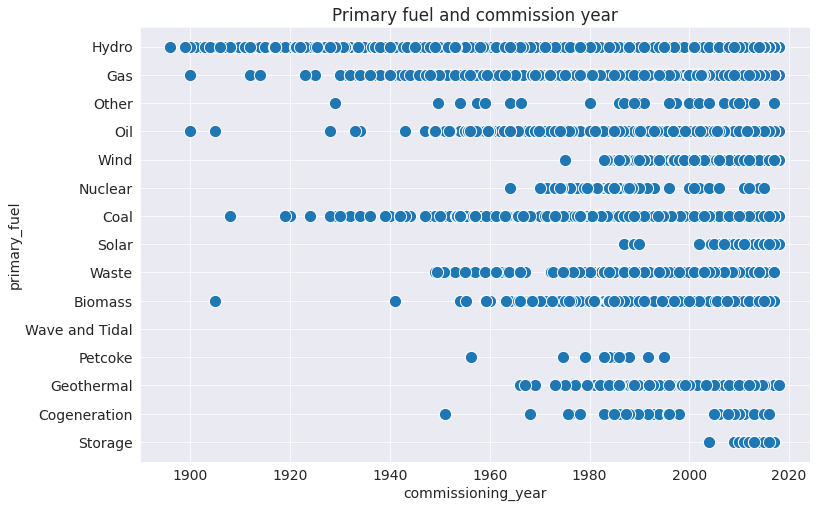

In [82]:
sns.scatterplot(x = global_power_plant_df.commissioning_year, y = global_power_plant_df.primary_fuel, s = 150);
plt.title('Primary fuel and commission year');

It is clear that from the beginning, the hydro power plant is the most popular among the other plants, and every country continues to build this type of plant. In the 21st century, renewable energy-based power plants (e.g. solar, wind) became more popular on the other hand popularity of nuclear power plants declined. Because the world saw the devastating effects of the nuclear power plant during the Chernobyl and Fukushima Daiichi nuclear disasters.

## Asking and Answering Questions

### Q1: Which country have a larger number (top 30) of renewable energy power plant?

Let find out what types of primary fuels power plants were used in the dataset  by using unique() method.

In [83]:
global_power_plant_df.primary_fuel.unique()

array(['Hydro', 'Gas', 'Other', 'Oil', 'Wind', 'Nuclear', 'Coal', 'Solar',
       'Waste', 'Biomass', 'Wave and Tidal', 'Petcoke', 'Geothermal',
       'Cogeneration', 'Storage'], dtype=object)

First we need to select the renewable or green energy based fuel from the list.

Renewable energy:
* Hydro
* Wind
* Solar
* Waste
* Biomass
* Wave and Tidal
* Geothermal Energy
* Storage


In [84]:
renewable_energy = global_power_plant_df[global_power_plant_df.primary_fuel.isin(['Hydro', 'Wind', 'Solar', 'Biomass', 'Wave and Tidal', 'Geothermal', 'Storage'])]
number_of_renewable_energy = renewable_energy.country_long.value_counts().head(30)
number_of_renewable_energy

United States of America    5069
United Kingdom              2126
France                      1979
China                       1908
Brazil                      1561
Canada                      1047
Germany                      598
India                        512
Spain                        495
Portugal                     432
Czech Republic               430
Norway                       301
Japan                        206
Vietnam                      181
Australia                    168
Italy                        166
Mexico                       163
Switzerland                  162
Sweden                       160
Chile                        155
Finland                      146
Russia                       131
Thailand                     130
Poland                       102
Austria                      100
South Africa                  73
Uruguay                       66
South Korea                   64
Argentina                     64
Philippines                   56
Name: coun

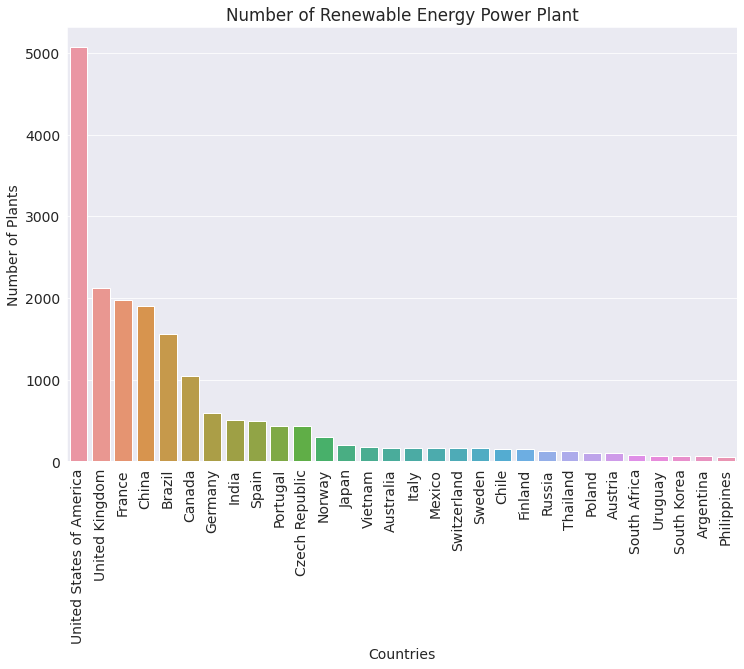

In [85]:
sns.barplot(x = number_of_renewable_energy.index, y = number_of_renewable_energy)
plt.xticks(rotation = 90)
plt.title('Number of Renewable Energy Power Plant')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

The US has around 5000 renewable energy plants, which are about 2.5 times higher than the UK runner-up. It is shocking that China is ranked 3rd, but it was on the top list of countries with power capacity.

### Q2: Which country has a heighest number (top 30) of fosil fuel energy power plant?

To answer this question first we need to select the fosil fuel type power plant from the primary_fuel column. 

Fosil fuels:
* Gas
* Oil
* Cod
* Nuclear
* Petcoke

I am considering nuclear power plant as a fosil fuel type. Because it is equally harmful to environment and human life in some measures.  

In [86]:
fosil_fuel = global_power_plant_df[global_power_plant_df.primary_fuel.isin(['Gas', 'Oil', 'Coal', 'Nuclear', 'Petcoke', 'Cogeneration'])]
number_of_fosil_fuel_plant = fosil_fuel.country_long.value_counts().head(30)
number_of_fosil_fuel_plant

United States of America    3033
China                       1133
Brazil                       766
Russia                       372
India                        349
Germany                      307
Australia                    210
Argentina                    165
Indonesia                    127
Japan                        122
Canada                       105
Spain                        104
Chile                         99
United Kingdom                89
Mexico                        88
Poland                        87
Saudi Arabia                  84
Iran                          79
Italy                         77
South Korea                   60
Bangladesh                    54
Turkey                        48
Philippines                   45
Vietnam                       39
France                        38
Thailand                      38
Egypt                         38
Pakistan                      36
Finland                       35
Venezuela                     34
Name: coun

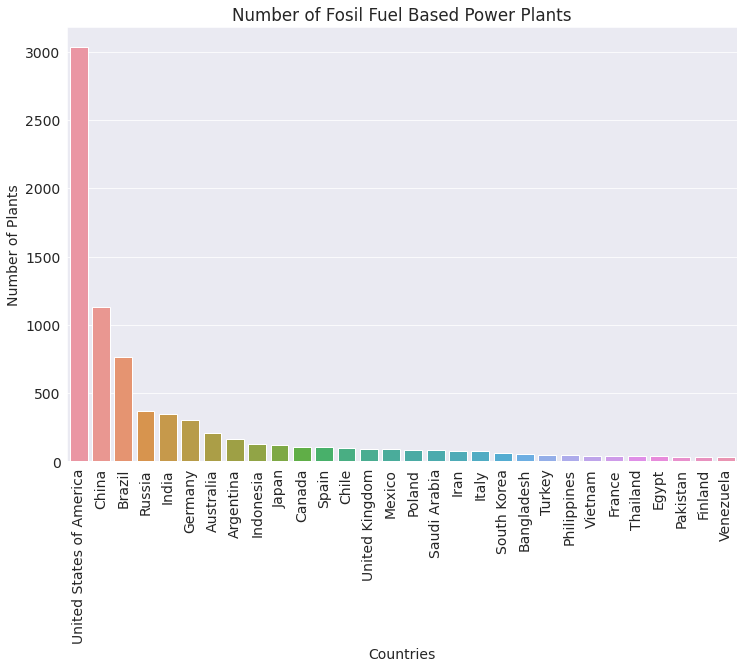

In [87]:
sns.barplot(x = number_of_fosil_fuel_plant.index, y = number_of_fosil_fuel_plant)
plt.xticks(rotation = 90)
plt.title('Number of Fosil Fuel Based Power Plants')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

### Q3: How many power plant have negative generating power?

There are some power plants in the data set that has negative generating power. Because to run the power plant it need power but some time it becomes greather than the power that are produce by the power plant itself. So the overall net power become negative.

In the dataset only United States of America has negative generating power. But in reality there are so many power plant around the world whose have negative generating power they just don't publishe the informatrion. So we will be caculated the total negative generating power in the USA from 2013 to 2017. 

In [88]:
negative_power_plant = global_power_plant_df[global_power_plant_df.generation_gwh_2013 < 0]
neg_gen_2013 = negative_power_plant.groupby('country_long')[['generation_gwh_2013']].sum().sort_values('generation_gwh_2013', ascending = False)

negative_power_plant = global_power_plant_df[global_power_plant_df.generation_gwh_2014 < 0]
neg_gen_2014 = negative_power_plant.groupby('country_long')[['generation_gwh_2014']].sum().sort_values('generation_gwh_2014', ascending = False)

negative_power_plant = global_power_plant_df[global_power_plant_df.generation_gwh_2015 < 0]
neg_gen_2015 = negative_power_plant.groupby('country_long')[['generation_gwh_2015']].sum().sort_values('generation_gwh_2015', ascending = False)

negative_power_plant = global_power_plant_df[global_power_plant_df.generation_gwh_2016 < 0]
neg_gen_2016 = negative_power_plant.groupby('country_long')[['generation_gwh_2016']].sum().sort_values('generation_gwh_2016', ascending = False)

negative_power_plant = global_power_plant_df[global_power_plant_df.generation_gwh_2017 < 0]
neg_gen_2017 = negative_power_plant.groupby('country_long')[['generation_gwh_2017']].sum().sort_values('generation_gwh_2017', ascending = False)


In [89]:
negative_generation_2013_to_2017 = pd.DataFrame([neg_gen_2013.generation_gwh_2013, neg_gen_2014.generation_gwh_2014, neg_gen_2015.generation_gwh_2015, neg_gen_2016.generation_gwh_2016, neg_gen_2017.generation_gwh_2017])
negative_generation_2013_to_2017

country_long,United States of America
generation_gwh_2013,-5521.368000
generation_gwh_2014,-6621.096997
generation_gwh_2015,-6059.512959
generation_gwh_2016,-7302.330000
generation_gwh_2017,-6895.367005


In [90]:
negative_generation_2013_to_2017.sum()

country_long
United States of America   -32399.674961
dtype: float64

### Q4: Which country has how many nuclear power plant? 

Nuclear power plant is the most reliable compare to other because they need less maintenance and are equipped to run for longer periods before refueling. At the same time, high-level engineering is required to operate the plant safely. So for this reason, several countries in the world have authorisation to build a nuclear power plant.

We will find out how many countries have a nuclear power plant by distinguishing countries that seem to have a nuclear power plant.

In [91]:
nuclear_plant = global_power_plant_df[global_power_plant_df.primary_fuel.isin(['Nuclear'])]
number_of_nuclear_plant = nuclear_plant.country_long.value_counts().head(35)
number_of_nuclear_plant

United States of America    61
France                      19
Japan                       16
China                       12
Russia                      10
India                        9
United Kingdom               8
Germany                      7
Canada                       6
South Korea                  6
Spain                        5
Switzerland                  4
Ukraine                      4
Sweden                       3
Belgium                      3
Taiwan                       3
Argentina                    3
Czech Republic               2
Slovakia                     2
Brazil                       2
Finland                      2
Pakistan                     2
South Africa                 1
Mexico                       1
Iran                         1
Netherlands                  1
Slovenia                     1
Armenia                      1
Romania                      1
Hungary                      1
Bulgaria                     1
Name: country_long, dtype: int64

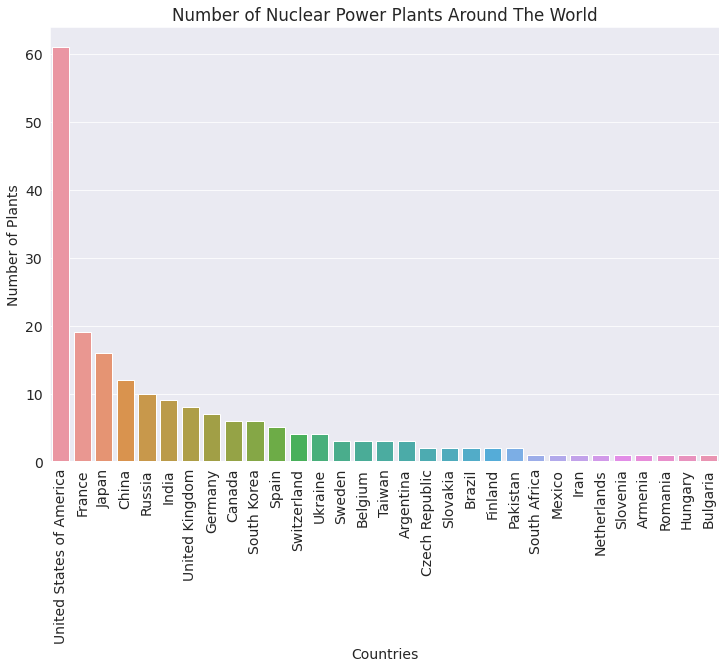

In [92]:
sns.barplot(x = number_of_nuclear_plant.index, y = number_of_nuclear_plant)
plt.xticks(rotation = 90)
plt.title('Number of Nuclear Power Plants Around The World')
plt.ylabel('Number of Plants')
plt.xlabel('Countries');

In [93]:
print('There are {} counties have total {} nuclear power plants.'.format(len(number_of_nuclear_plant), number_of_nuclear_plant.sum()))

There are 31 counties have total 198 nuclear power plants.


### Q5: How many power plant Bangladesh (my country) has? What is the total capacity?  

Bangladesgh is a country in South Asia. Bangladesh economy is a growing market economy. It has an outstanding growth and development track record. The power sector is also developing rapidly as it is crucial for development. Several power plant works are under construction. Bangladesh also has an ongoing project to build a nuclear power plant in Ruppur.

From the data collection, we can see the current state of the power sector in Bangladesh.

In [94]:
bd_power_plant = global_power_plant_df[global_power_plant_df.country_long == 'Bangladesh']

In [95]:
total_power_plant = bd_power_plant.country_long.value_counts()
total_power_plant

Bangladesh    55
Name: country_long, dtype: int64

There are 55 (runing) power plant in Bangaldesh.

Total capacity of generation power can also be caculated.  

In [96]:
total_capacity = bd_power_plant.capacity_mw.sum()
print('Bangladesh has total capacity of {} megawatt.'.format(total_capacity))

Bangladesh has total capacity of 11807.0 megawatt.


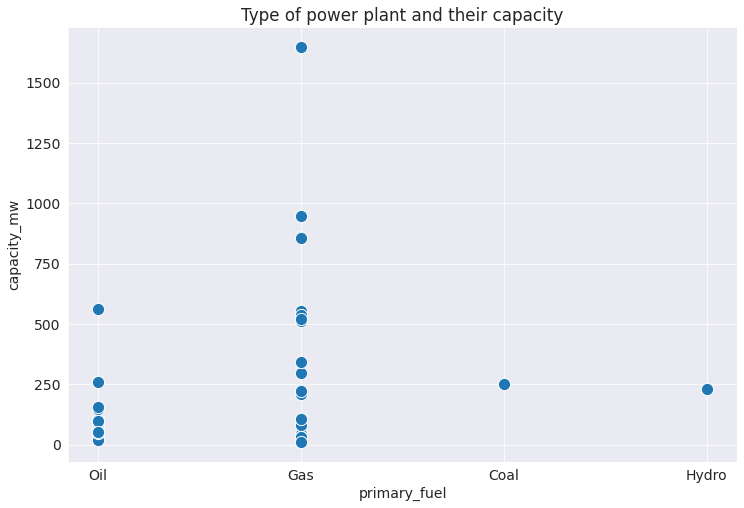

In [97]:
sns.scatterplot(x = bd_power_plant.primary_fuel, y = bd_power_plant.capacity_mw, s = 150)
plt.title('Type of power plant and their capacity');

Bangladesh's natural gas reserves amount to 14.16 trillion cubic feet. That is why Bangladesh has so many gas power plants with the highest capacity compared to others. There is only one renewable hydro power plant in Bangladesh.  

# Inferences and Conclusions

This analysis gives us an insight into the depth of power plants around the world. How the world produces one of the most important elements, as the country's economic and overall infrastructure depends on electricity.

The world is facing global warming, and pollution from power plants is one of the reasons for this. We need to control pollution and urge on countries around the world to build more renewable or green energy power plants.

# References and Future Work

There's a lot of knowledge to be found from the survey, and we've just scratched the surface. Here are some ideas for further investigation:
* In the data frame there are column names for latitude, longitude and plant name, using the google maps API, we can generate geographical locations for each power plant.     
* Choose a separate set of columns (we selected 16 out of 23) to evaluate other data facets.


References:
* Global Power Plant Database: https://datasets.wri.org/dataset/globalpowerplantdatabase  or https://www.kaggle.com/georgeputhean/globalpowerplantdata
* Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
* Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
* Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
* Opendatasets Python library: https://github.com/JovianML/opendatasets



In [100]:
import jovian

In [101]:
jovian.commit(project = 'data-analysis-with-python-zero-to-pandas-course-project')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/najmolanwar5/data-analysis-with-python-zero-to-pandas-course-project


'https://jovian.ml/najmolanwar5/data-analysis-with-python-zero-to-pandas-course-project'